<a href="https://colab.research.google.com/github/Luckykantnayak/Hello-world/blob/main/Lucky_Kant_Nayak_LAB_2_Jet_Propeller.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

# Typical Weight fraction for takeoff, Climb, Descent, Approach and Landing 
w21= 0.98
w32= 0.97  
w54= 0.99       
w65=0.997     

R = 1000     # range in  Km
E = 40/60      # Endurance in hrs
Ct_Cr = 0.9       # TSFC for cruise 1/hr
Ct_L = 0.8        # TSFC for cruise 1/hr
Vc = 518     # Cruise Velocity in Km/hr

LD = np.arange(12,21,1)  # L/D in the range from 12 to 20

In [ ]:
import math as m
from scipy.optimize import fsolve
import matplotlib.pyplot as plt


wC43= np.exp(-R*Ct_Cr/(Vc*LD))   # weight fraction during cruise
wL54 =  np.exp(-E*Ct_L/(LD))     # weight fraction during loiter

wfwo = 1.05*(1-w21*w32*wC43*w54*wL54*w65)   # fuel weight fraction calculation

In [ ]:
Wp = 6325   # Payload weight in Kg

wewo = np.zeros(len(wfwo))
for i in np.arange(len(wfwo)):
  def F(wewo):
      a=-7.754*m.pow(10,-8)    # for Jet Transport type aircraft
      b=0.576
      return (wewo-a*Wp/(1-wewo-wfwo[i])-b)
  
  wewo[i]=fsolve(F,0.1)[0]    # Empty weight fraction calculation by 2nd method in lectures


In [ ]:
Wo = Wp/(1-wewo-wfwo)
Wf = wfwo*Wo
print(Wo[3], "Kg") # Total Weight at L/D = 15

28365.614875446012 Kg


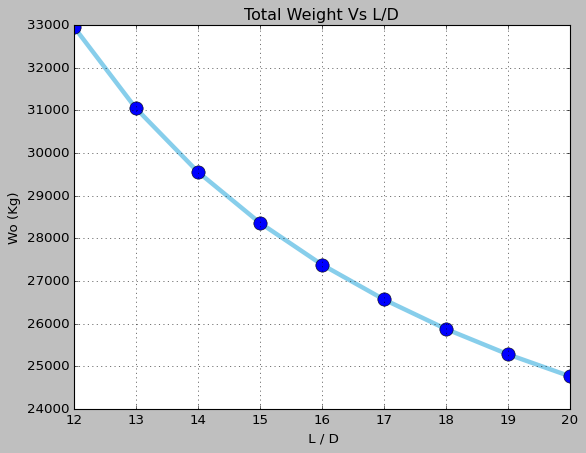

In [ ]:
plt.style.use('classic')

plt.plot( LD,Wo, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.xlabel(" L / D")
plt.ylabel("Wo (Kg)")
plt.title("Total Weight Vs L/D")
plt.grid()
plt.show()

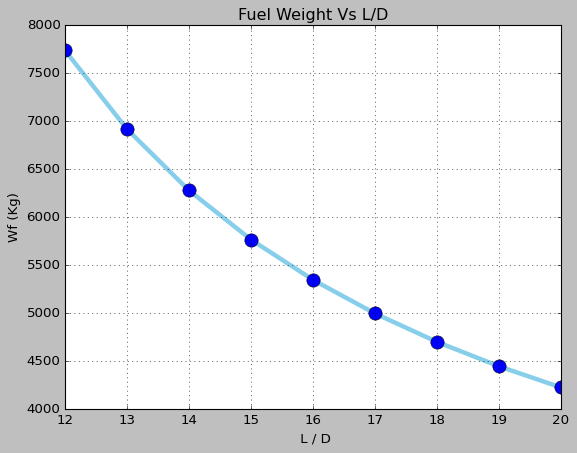

In [ ]:
plt.style.use('classic')
plt.plot( LD,Wf, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.xlabel(" L / D")
plt.ylabel("Wf (Kg)")
plt.title("Fuel Weight Vs L/D")
plt.grid()
plt.show()